In [1]:
import importlib
import itertools
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

np.random.seed(33333)
torch.manual_seed(33333)
%matplotlib inline

In [70]:
import analysis
import razor_data
import toy_data
import plotting
import gp
importlib.reload(analysis);
importlib.reload(razor_data);
importlib.reload(toy_data);
importlib.reload(plotting);

Will first run Bayesian optimization for 30 iterations on the HMC hyperparameters
Performing initial model fit
Beginning HMC iterations with epsilon=4.8429548620078844e-05, L_max=25
Acceptance rate: 0.814 (0 bad samples)
Beginning HMC iterations with epsilon=6.013378053023729e-05, L_max=23
Acceptance rate: 0.799 (0 bad samples)
Beginning HMC iterations with epsilon=2.0994487622544796e-05, L_max=18
Acceptance rate: 0.945 (0 bad samples)
Beginning HMC iterations with epsilon=0.038452587860226366, L_max=14
Acceptance rate: 0.000 (68 bad samples)
Beginning HMC iterations with epsilon=0.017863048467569285, L_max=10
Acceptance rate: 0.000 (80 bad samples)
Beginning HMC iterations with epsilon=4.5183754777347086e-05, L_max=11
Acceptance rate: 0.902 (0 bad samples)
Beginning HMC iterations with epsilon=0.026103153556727172, L_max=24
Acceptance rate: 0.000 (98 bad samples)
Beginning HMC iterations with epsilon=0.024603704884222758, L_max=23
Acceptance rate: 0.000 (174 bad samples)
Beginning HMC

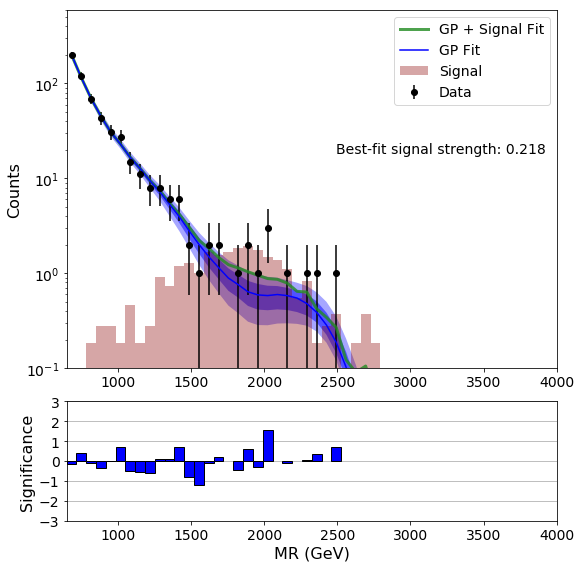

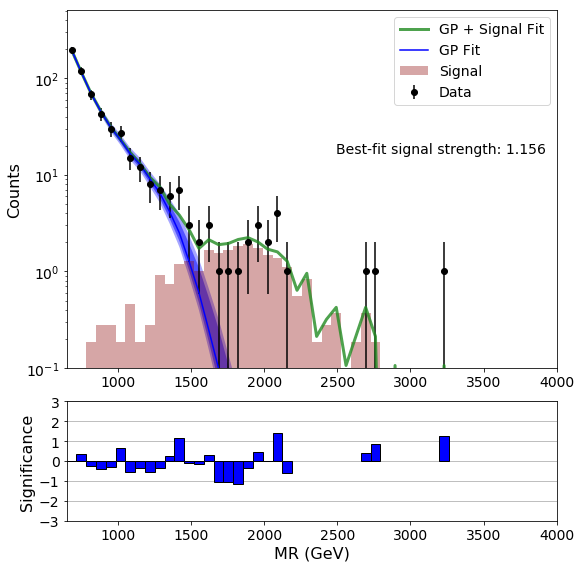

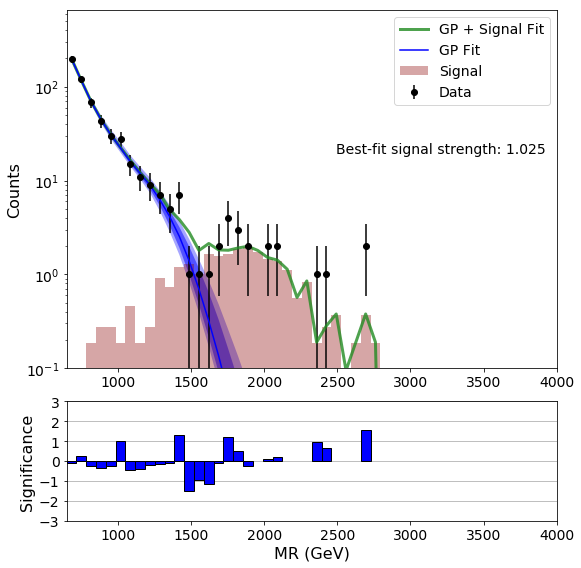

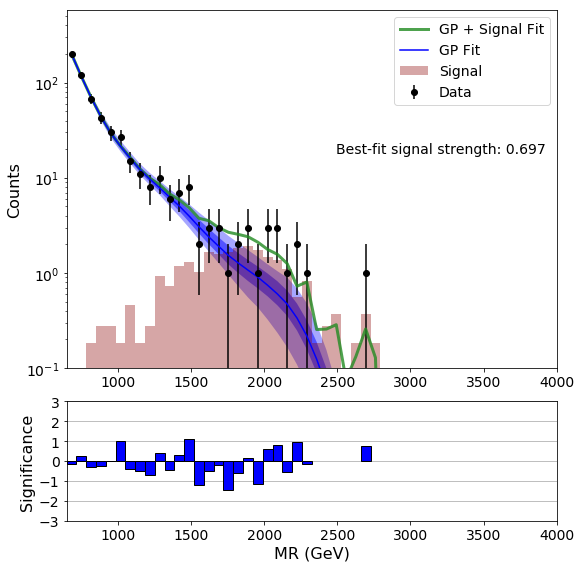

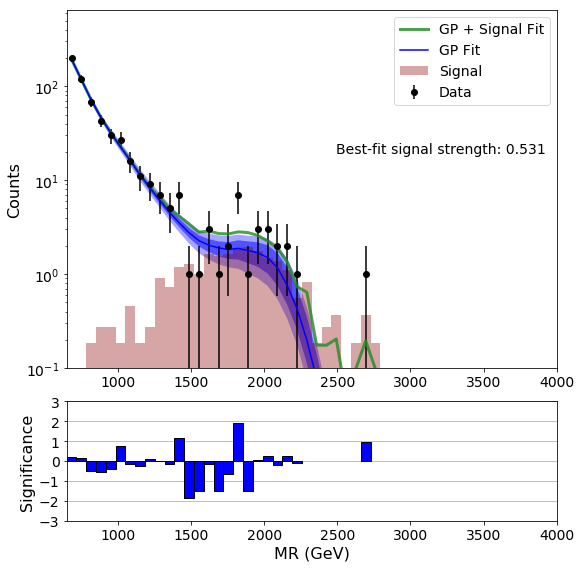

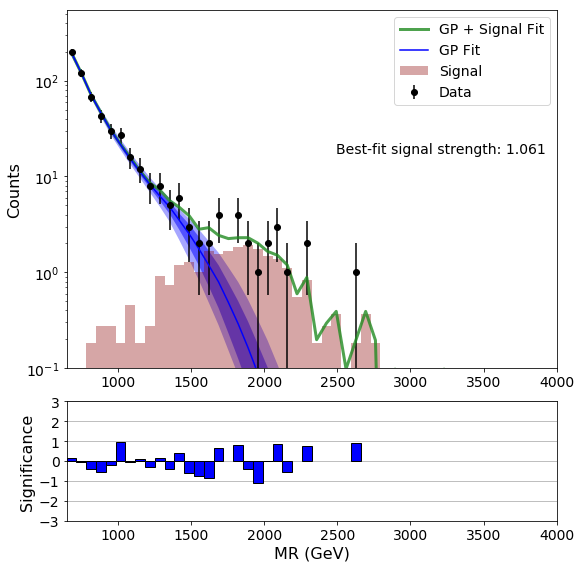

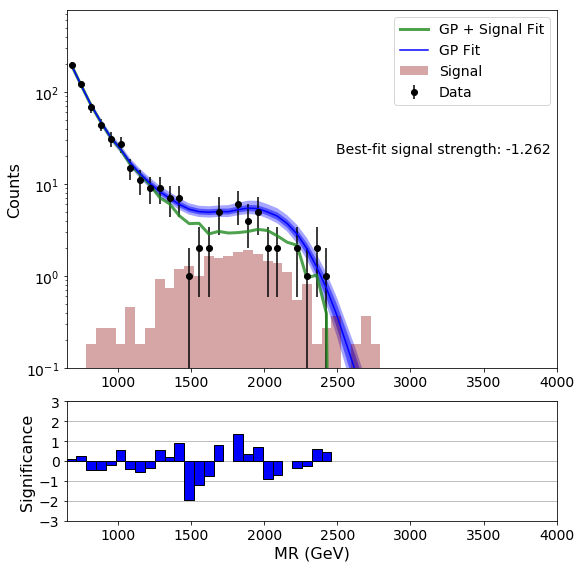

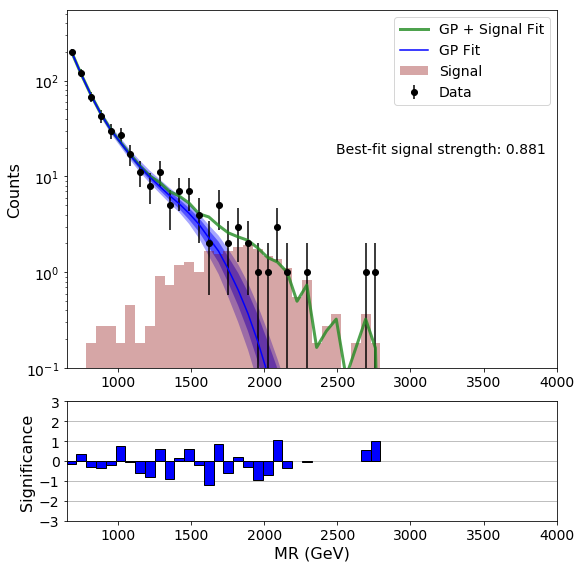

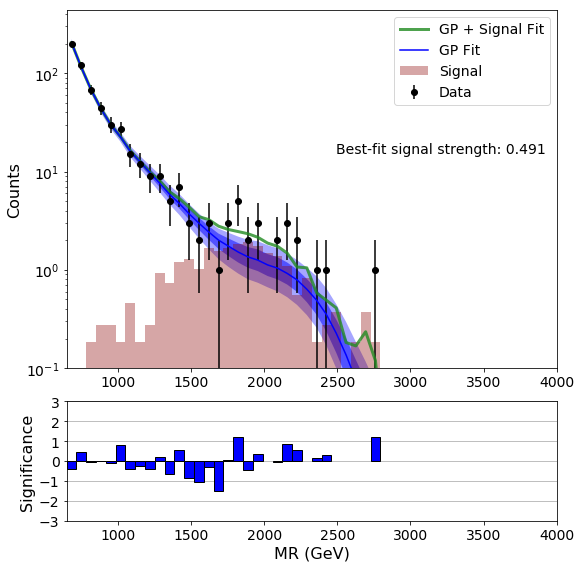

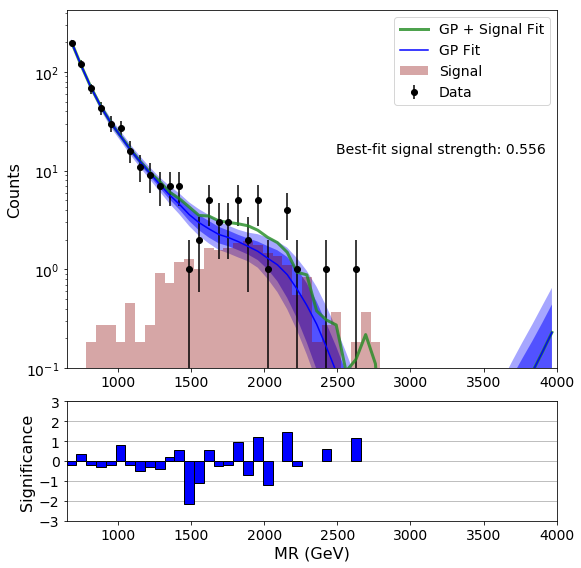

In [3]:
box = 'SevenJet'
btags = 2
num_mr_bins = 50
mr_max = 4000
sms = 'T1tttt_1800_100'
mu_true = 1.0
k_ell = 700
k_alpha = 400

results = analysis.run_s_plus_b(box, btags, sms, num_mr_bins, mr_max, verbose=False,
              k_ell=k_ell, k_alpha=k_alpha, mu_true=mu_true, num_samples=40000, runs=10, opt_iterations=30)

In [36]:
def scatter_extracted_signal(Gs, nmax=40):
    """
    Make a scatter plot of actual and estimated number of signal events.
    """
    quantiles = [16, 50, 84]
    bands = {q: [] for q in quantiles}
    true_signal = []
    for G in Gs:
        if np.isnan(np.asarray([s[0] for s in G.signal_samples])).any():
            continue
        nominal_signal = G.S.data.numpy().sum()
        true_signal.append(G.num_true_signal)
        for q in quantiles:
            bands[q].append(nominal_signal * np.percentile([s[0] for s in G.signal_samples], q))
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.errorbar(true_signal, bands[50], 
                 yerr=(np.asarray(bands[84])-np.asarray(bands[16])), fmt='bp', linestyle='None')
    plt.xlabel('True # signal events', fontsize=16)
    plt.ylabel('Fitted # signal events', fontsize=16)
    plt.tick_params(labelsize=14)
    plt.ylim(ymin=0, ymax=nmax)
    plt.xlim(xmin=0, xmax=nmax)
    plt.plot(np.arange(nmax), np.arange(nmax), linewidth=2, color='k')

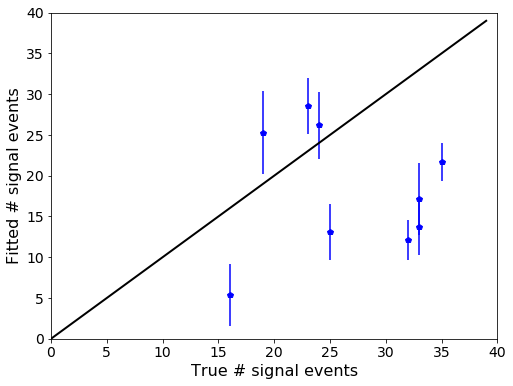

In [17]:
scatter_extracted_signal(results)
plt.show();

Will first run Bayesian optimization for 30 iterations on the HMC hyperparameters
Performing initial model fit
Beginning HMC iterations with epsilon=0.01917967846562856, L_max=16
Acceptance rate: 0.000 (106 bad samples)
Beginning HMC iterations with epsilon=0.00011916251843587372, L_max=5
Acceptance rate: 0.842 (0 bad samples)
Beginning HMC iterations with epsilon=0.06738709512573376, L_max=5
Acceptance rate: 0.000 (0 bad samples)
Beginning HMC iterations with epsilon=0.0014389618871368946, L_max=21
Acceptance rate: 0.034 (41 bad samples)
Beginning HMC iterations with epsilon=0.00015308692055842035, L_max=21
Acceptance rate: 0.429 (0 bad samples)
Beginning HMC iterations with epsilon=0.028103733271014814, L_max=25
Acceptance rate: 0.000 (79 bad samples)
Beginning HMC iterations with epsilon=0.0008199873977627298, L_max=13
Acceptance rate: 0.113 (4 bad samples)
Beginning HMC iterations with epsilon=0.10547766498166176, L_max=8
Acceptance rate: 0.000 (0 bad samples)
Beginning HMC iterati

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/nfshome/duanders/gpu-3-imperium/data/MLPhysics/razor_fits/gp/plotting.py:108: RuntimeWarning: invalid value encountered in less
  samples_withnoise = np.random.poisson(samples_withsignal)
/nfshome/duanders/gpu-3-imperium/data/MLPhysics/razor_fits/gp/plotting.py:108: RuntimeWarning: invalid value encountered in greater
  samples_withnoise = np.random.poisson(samples_withsignal)


Best-fit signal: nan
Fitted nan signal events vs. 67.00 generated
Wrote image file MultiJet_2b_T2bb_1000_100_mu-1.0_run-5.png
Starting run #6
Beginning HMC iterations with epsilon=0.0010194756409832536, L_max=7
Acceptance rate: 0.153 (0 bad samples)
Best-fit signal: 0.518
Fitted 28.13 signal events vs. 51.00 generated
Wrote image file MultiJet_2b_T2bb_1000_100_mu-1.0_run-6.png
Starting run #7
Beginning HMC iterations with epsilon=0.0010194756409832536, L_max=7
Acceptance rate: 0.153 (0 bad samples)
Best-fit signal: 0.373
Fitted 20.27 signal events vs. 61.00 generated
Wrote image file MultiJet_2b_T2bb_1000_100_mu-1.0_run-7.png
Starting run #8
Beginning HMC iterations with epsilon=0.0010194756409832536, L_max=7
Acceptance rate: 0.157 (0 bad samples)
Best-fit signal: 0.701
Fitted 38.06 signal events vs. 60.00 generated
Wrote image file MultiJet_2b_T2bb_1000_100_mu-1.0_run-8.png
Starting run #9
Beginning HMC iterations with epsilon=0.0010194756409832536, L_max=7
Acceptance rate: 0.170 (0 b

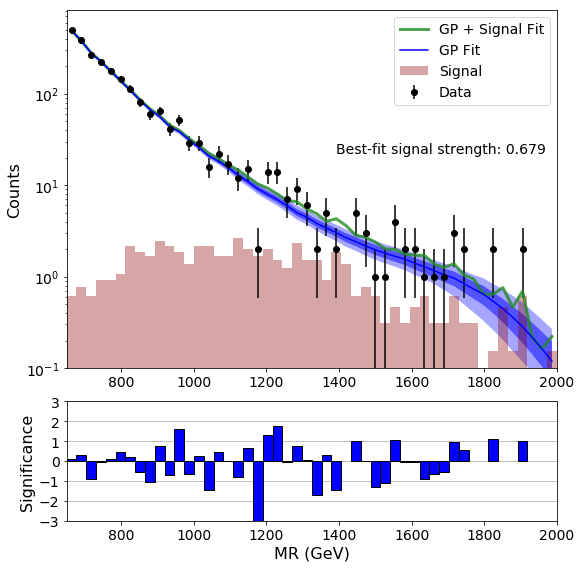

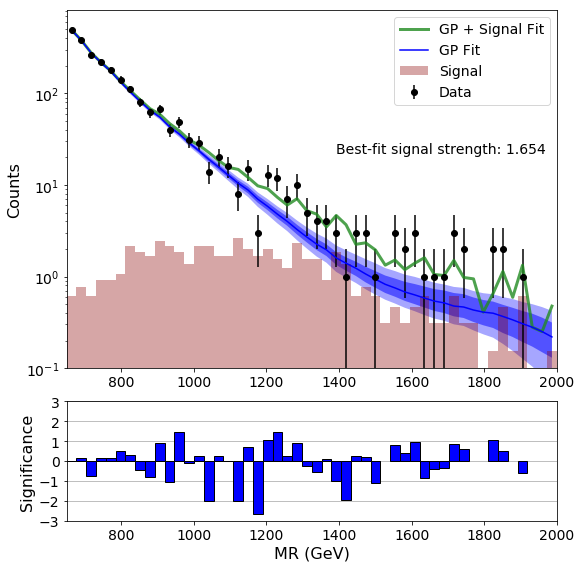

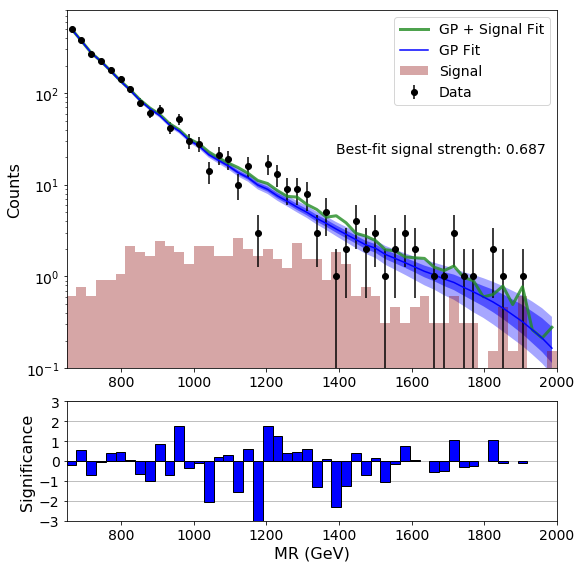

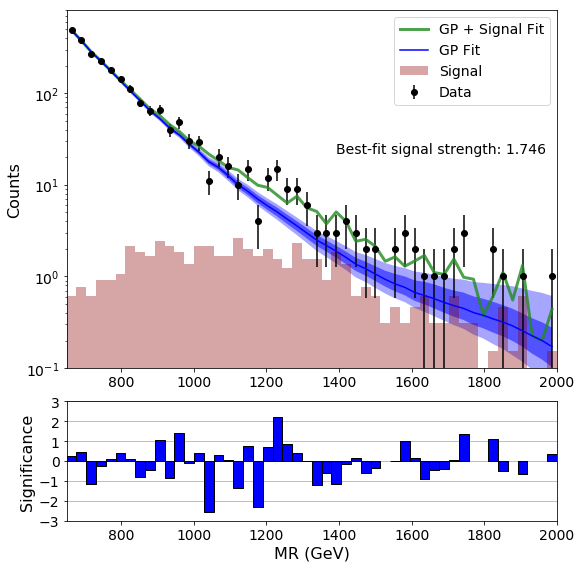

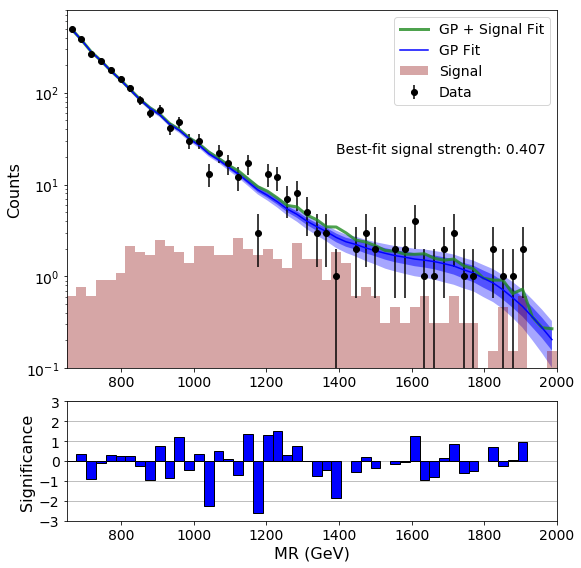

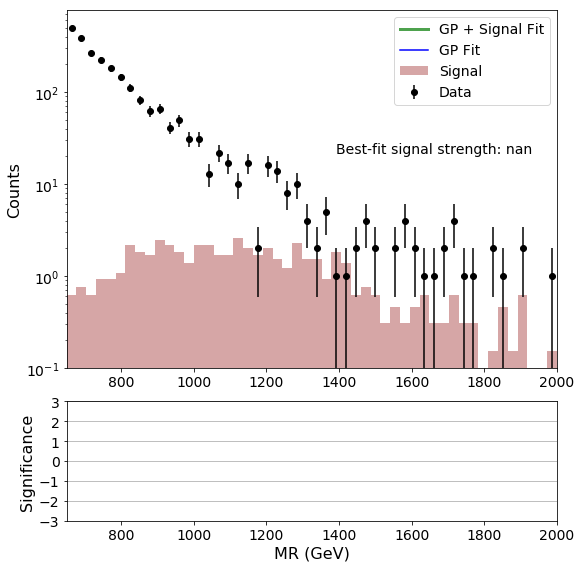

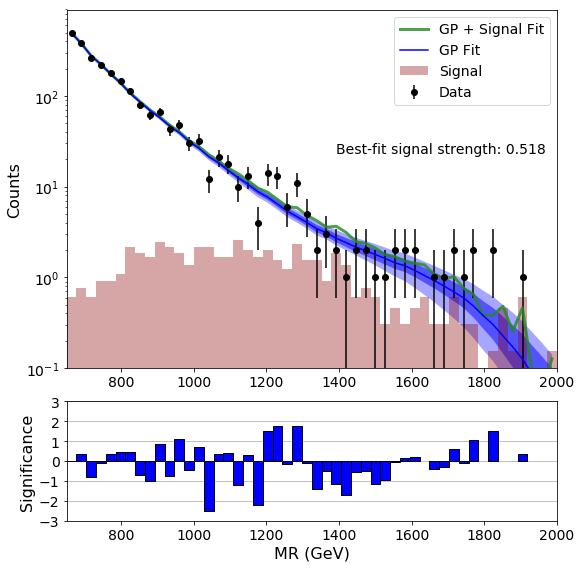

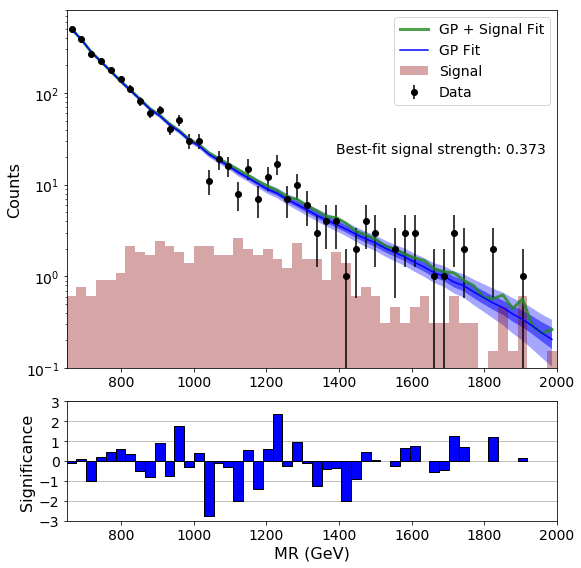

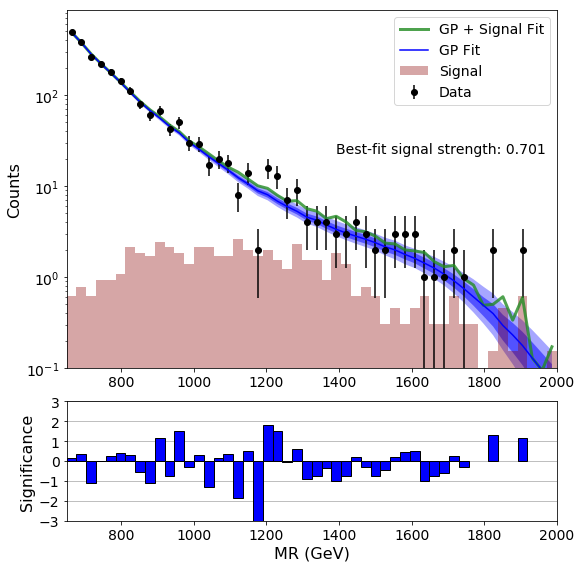

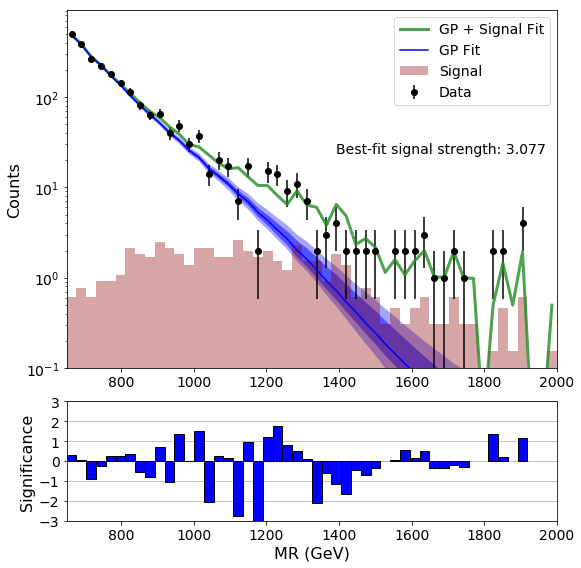

In [22]:
box = 'MultiJet'
btags = 2
num_mr_bins = 50
mr_max = 2000
sms = 'T2bb_1000_100'
mu_true = 1.0
k_ell = 500
k_alpha = 200

results = analysis.run_s_plus_b(box, btags, sms, num_mr_bins, mr_max, verbose=False,
              k_ell=k_ell, k_alpha=k_alpha, mu_true=mu_true, num_samples=40000, runs=10, opt_iterations=30)

Will first run Bayesian optimization for 30 iterations on the HMC hyperparameters
Performing initial model fit
Beginning HMC iterations with epsilon=0.02948441758127488, L_max=13
Acceptance rate: 0.000 (39 bad samples)
Beginning HMC iterations with epsilon=3.680336136326045e-05, L_max=11
Acceptance rate: 0.899 (0 bad samples)
Beginning HMC iterations with epsilon=0.012295176881237033, L_max=13
Acceptance rate: 0.001 (127 bad samples)
Beginning HMC iterations with epsilon=0.0006172930649597713, L_max=1
Acceptance rate: 0.670 (0 bad samples)
Beginning HMC iterations with epsilon=0.007345219991506685, L_max=22
Acceptance rate: 0.000 (27 bad samples)
Beginning HMC iterations with epsilon=2.4176669333593935e-05, L_max=17
Acceptance rate: 0.894 (0 bad samples)
Beginning HMC iterations with epsilon=0.00036439904935991086, L_max=24
Acceptance rate: 0.138 (7 bad samples)
Beginning HMC iterations with epsilon=0.009402293581863116, L_max=13
Acceptance rate: 0.000 (8 bad samples)
Beginning HMC ite

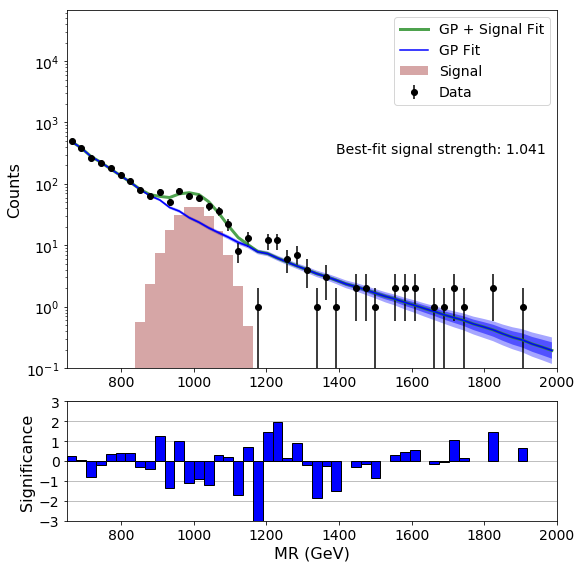

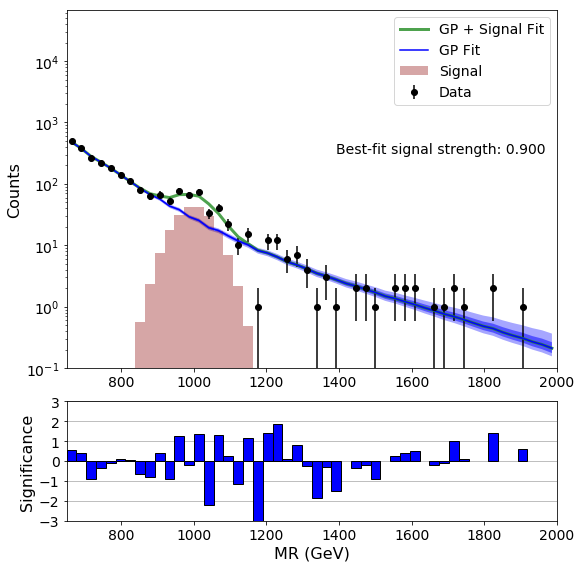

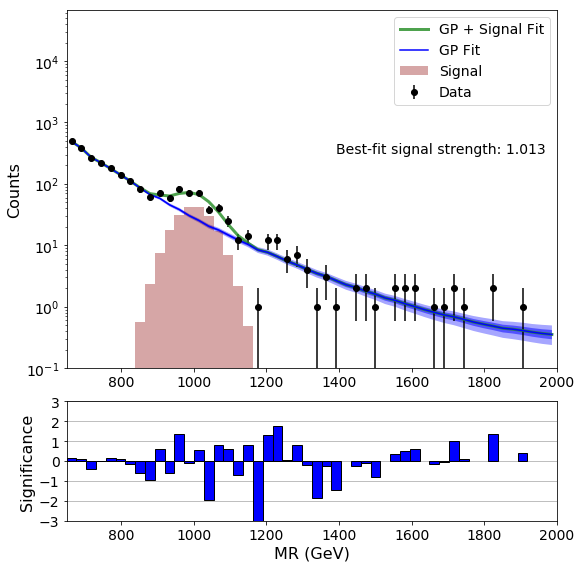

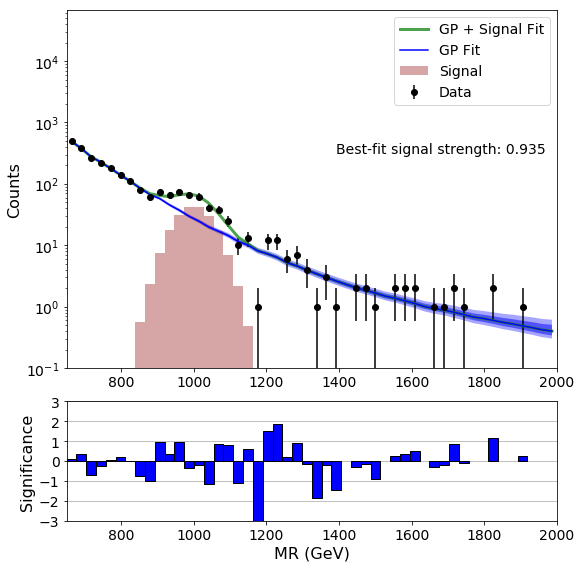

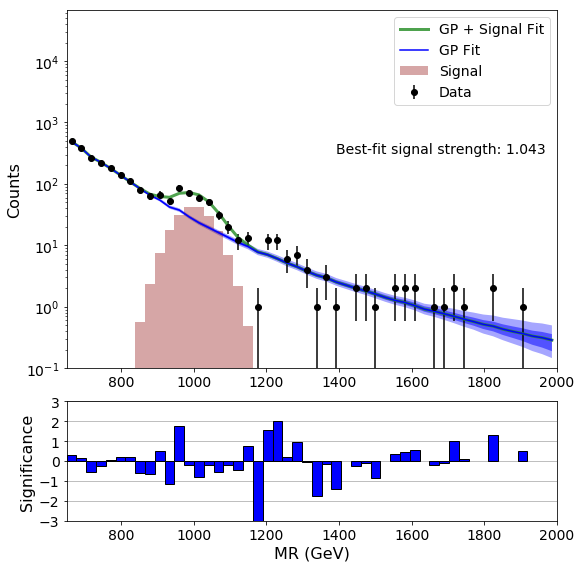

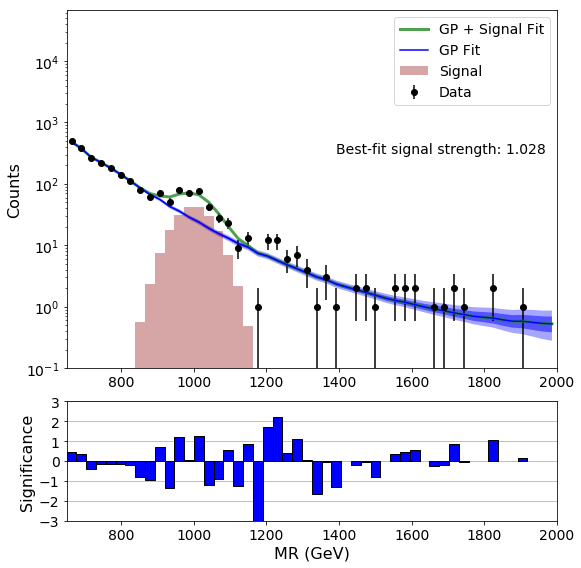

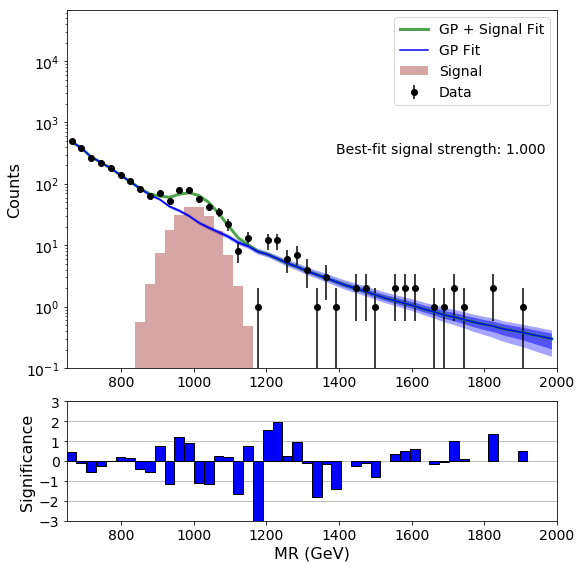

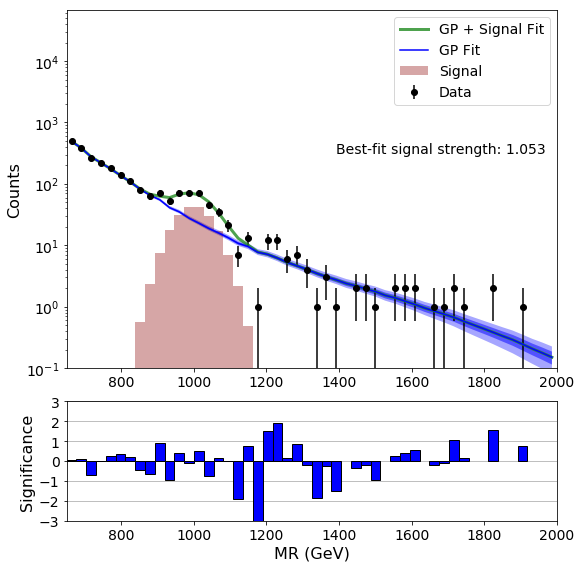

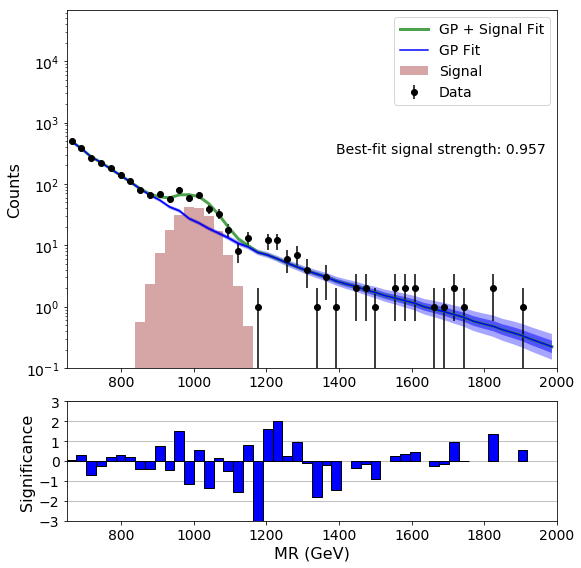

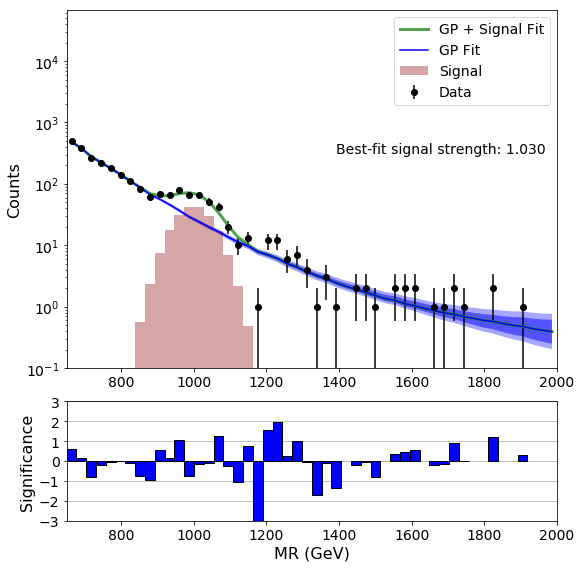

In [73]:
box = 'MultiJet'
btags = 2
num_mr_bins = 50
mr_max = 2000
sms = 'fake'
mu_true = 1.0
k_ell = 800
k_alpha = 300

results = analysis.run_s_plus_b(box, btags, sms, num_mr_bins, mr_max, verbose=False,
              k_ell=k_ell, k_alpha=k_alpha, mu_true=mu_true, num_samples=40000, runs=10, opt_iterations=30)

Will first run Bayesian optimization for 30 iterations on the HMC hyperparameters
Performing initial model fit
Beginning HMC iterations with epsilon=0.0007734284737517607, L_max=30
Acceptance rate: 0.034 (13 bad samples)
Beginning HMC iterations with epsilon=0.002490837056713014, L_max=5
Acceptance rate: 0.035 (13 bad samples)
Beginning HMC iterations with epsilon=8.193341173074129e-05, L_max=24
Acceptance rate: 0.548 (0 bad samples)
Beginning HMC iterations with epsilon=0.0014267813400625964, L_max=27
Acceptance rate: 0.017 (45 bad samples)
Beginning HMC iterations with epsilon=8.773060361546202e-05, L_max=10
Acceptance rate: 0.760 (0 bad samples)
Beginning HMC iterations with epsilon=0.003324639237352936, L_max=18
Acceptance rate: 0.012 (24 bad samples)
Beginning HMC iterations with epsilon=0.1120991036102232, L_max=30
Acceptance rate: 0.000 (0 bad samples)
Beginning HMC iterations with epsilon=0.12921045769571043, L_max=19
Acceptance rate: 0.000 (0 bad samples)
Beginning HMC iterati

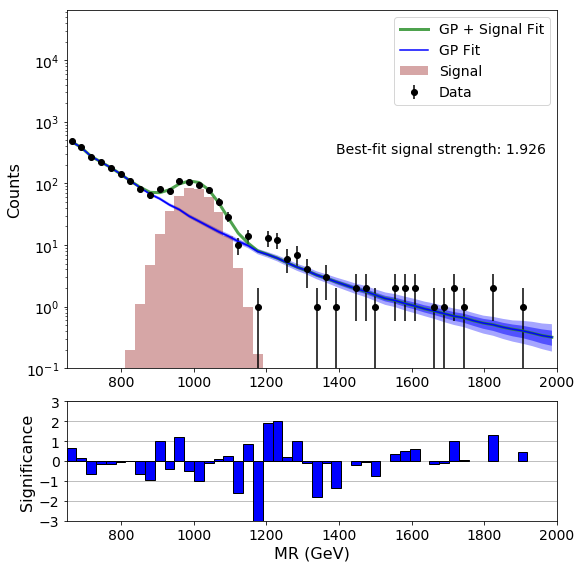

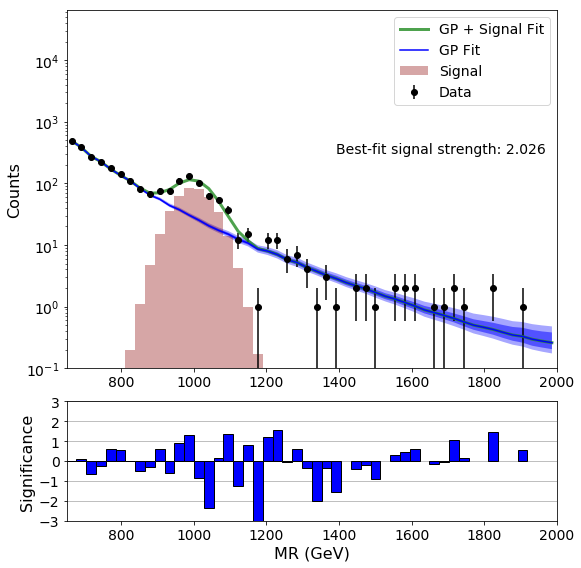

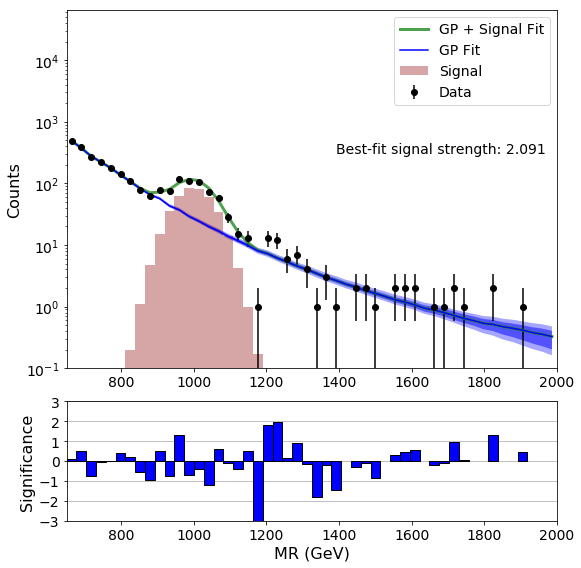

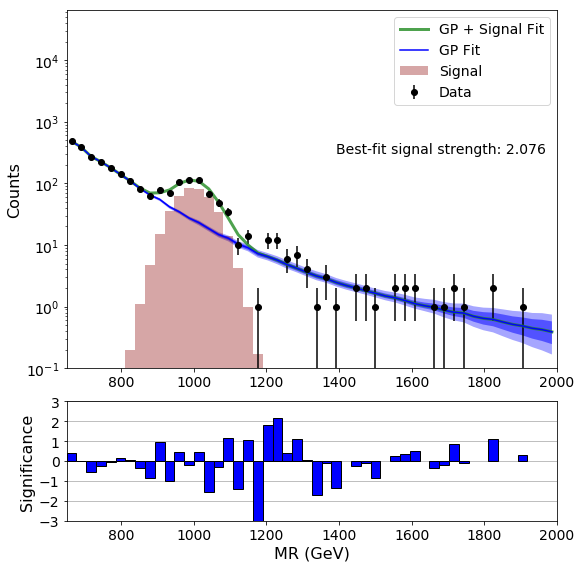

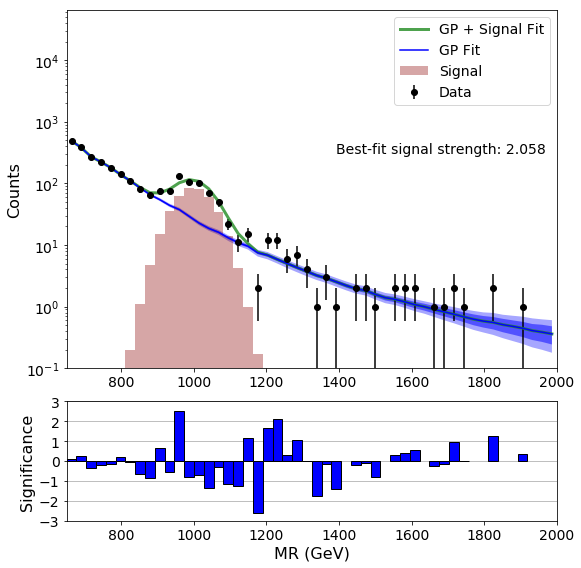

In [75]:
results_2 = analysis.run_s_plus_b(box, btags, sms, num_mr_bins, mr_max, verbose=False,
              k_ell=k_ell, k_alpha=k_alpha, mu_true=2.0, num_samples=40000, runs=5, opt_iterations=30)

Will first run Bayesian optimization for 30 iterations on the HMC hyperparameters
Performing initial model fit
Beginning HMC iterations with epsilon=0.007542139871865975, L_max=16
Acceptance rate: 0.001 (21 bad samples)
Beginning HMC iterations with epsilon=0.024342130625059025, L_max=22
Acceptance rate: 0.000 (47 bad samples)
Beginning HMC iterations with epsilon=0.0016745045007966672, L_max=21
Acceptance rate: 0.021 (35 bad samples)
Beginning HMC iterations with epsilon=0.0004378208429363638, L_max=9
Acceptance rate: 0.296 (0 bad samples)
Beginning HMC iterations with epsilon=2.2260739865575164e-05, L_max=13
Acceptance rate: 0.907 (0 bad samples)
Beginning HMC iterations with epsilon=2.3852492603220406e-05, L_max=8
Acceptance rate: 0.936 (0 bad samples)
Beginning HMC iterations with epsilon=0.0005936421737819061, L_max=29
Acceptance rate: 0.061 (19 bad samples)
Beginning HMC iterations with epsilon=0.0008086084654270708, L_max=12
Acceptance rate: 0.107 (6 bad samples)
Beginning HMC i

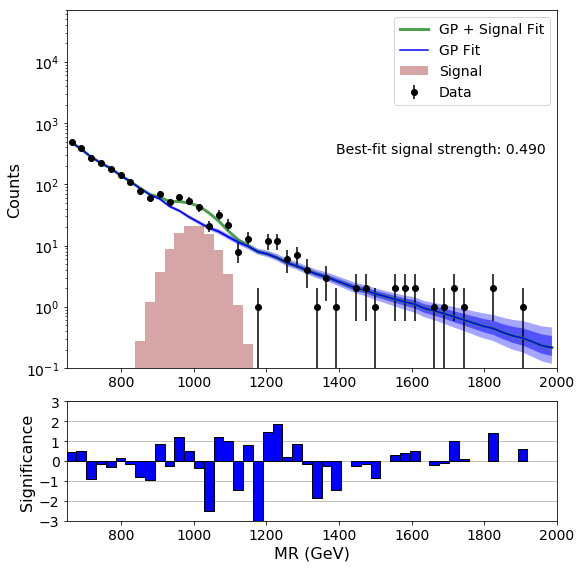

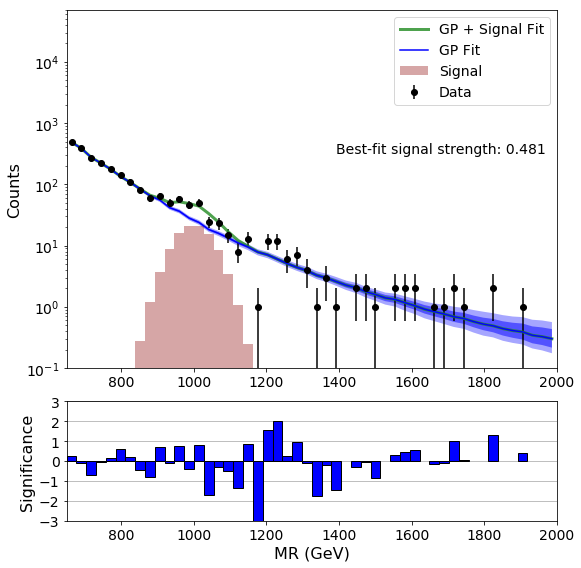

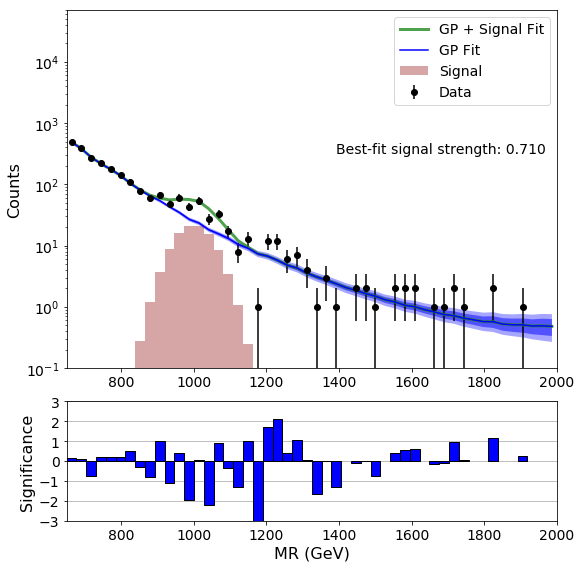

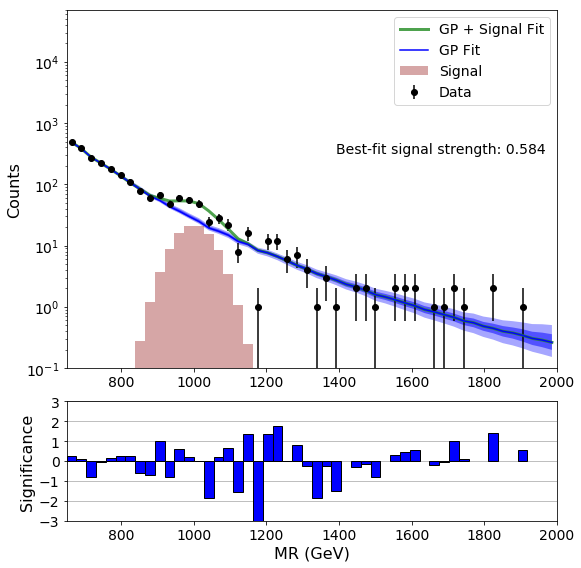

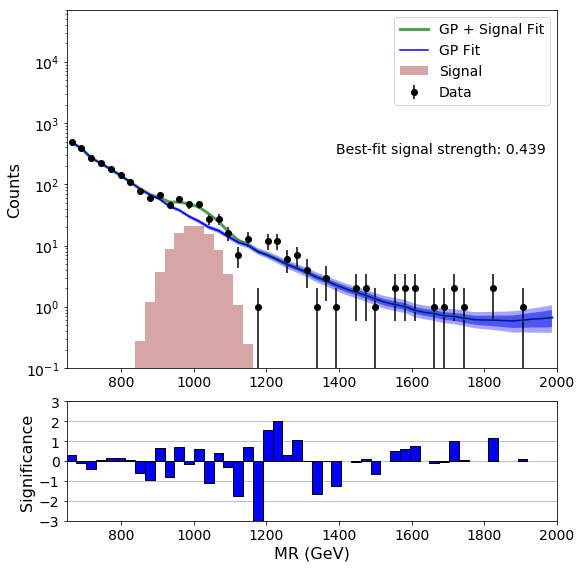

In [78]:
results_0p5 = analysis.run_s_plus_b(box, btags, sms, num_mr_bins, mr_max, verbose=False,
              k_ell=k_ell, k_alpha=k_alpha, mu_true=0.5, num_samples=40000, runs=5, opt_iterations=30)

Will first run Bayesian optimization for 30 iterations on the HMC hyperparameters
Performing initial model fit
Beginning HMC iterations with epsilon=0.024433730030341484, L_max=12
Acceptance rate: 0.000 (50 bad samples)
Beginning HMC iterations with epsilon=0.004244840291322037, L_max=11
Acceptance rate: 0.005 (46 bad samples)
Beginning HMC iterations with epsilon=0.0002718626380130521, L_max=1
Acceptance rate: 0.857 (0 bad samples)
Beginning HMC iterations with epsilon=0.0002685232942236546, L_max=2
Acceptance rate: 0.793 (0 bad samples)
Beginning HMC iterations with epsilon=0.017247381382015654, L_max=1
Acceptance rate: 0.000 (0 bad samples)
Beginning HMC iterations with epsilon=1.788714876498348e-05, L_max=24
Acceptance rate: 0.886 (0 bad samples)
Beginning HMC iterations with epsilon=2.4689099727502373e-05, L_max=28
Acceptance rate: 0.792 (0 bad samples)
Beginning HMC iterations with epsilon=0.00020285604395693638, L_max=15
Acceptance rate: 0.403 (0 bad samples)
Beginning HMC itera

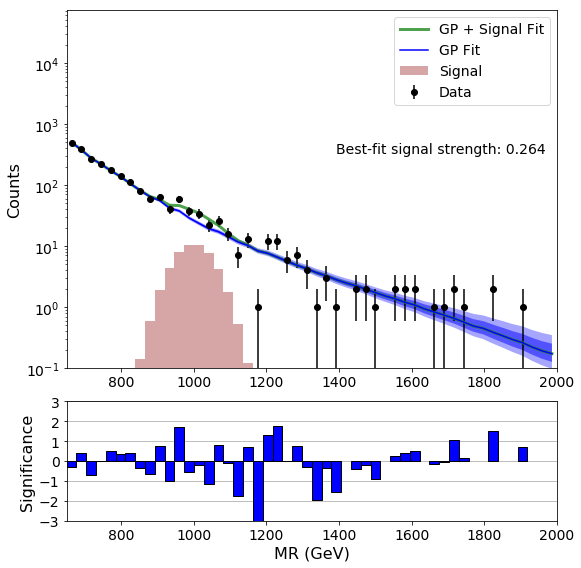

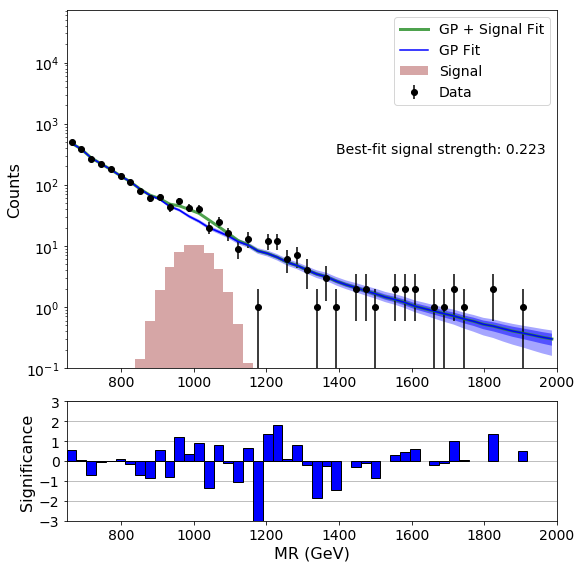

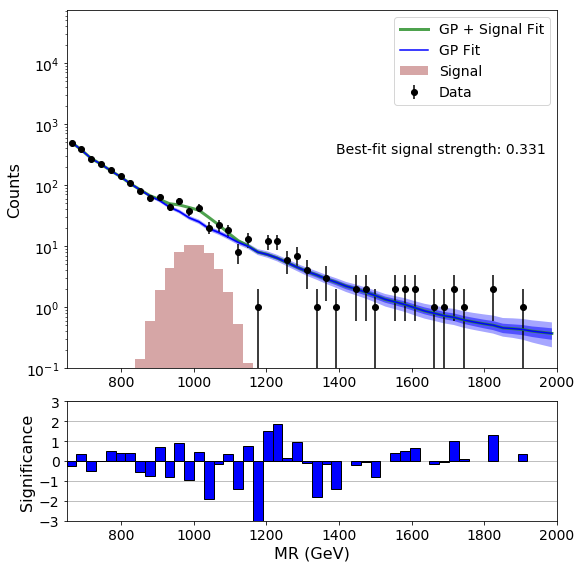

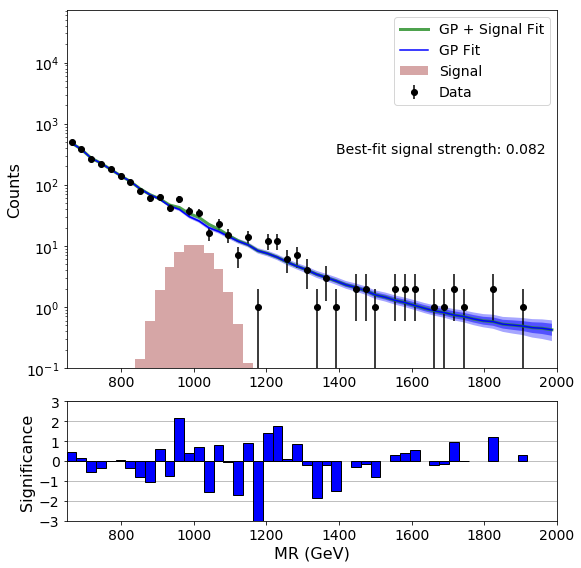

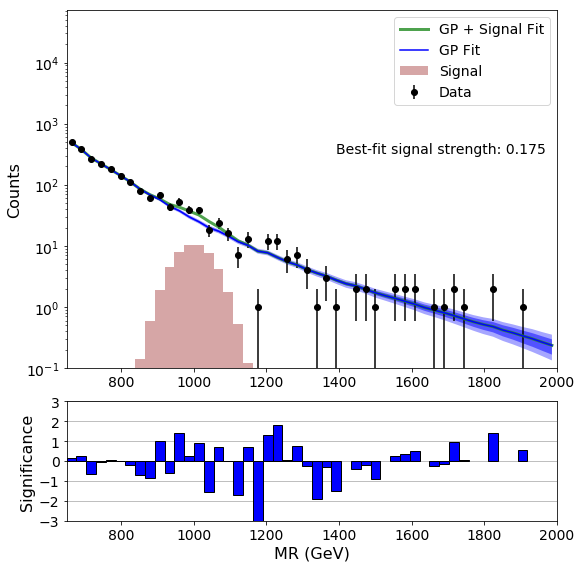

In [80]:
results_0p25 = analysis.run_s_plus_b(box, btags, sms, num_mr_bins, mr_max, verbose=False,
              k_ell=k_ell, k_alpha=k_alpha, mu_true=0.25, num_samples=40000, runs=5, opt_iterations=30)

Will first run Bayesian optimization for 30 iterations on the HMC hyperparameters
Performing initial model fit
Beginning HMC iterations with epsilon=0.014517950893522877, L_max=6
Acceptance rate: 0.000 (200 bad samples)
Beginning HMC iterations with epsilon=5.720965097617437e-05, L_max=9
Acceptance rate: 0.857 (0 bad samples)
Beginning HMC iterations with epsilon=0.0007744452880700509, L_max=15
Acceptance rate: 0.092 (11 bad samples)
Beginning HMC iterations with epsilon=0.07701196828035105, L_max=21
Acceptance rate: 0.000 (2 bad samples)
Beginning HMC iterations with epsilon=0.03741980845185823, L_max=12
Acceptance rate: 0.000 (0 bad samples)
Beginning HMC iterations with epsilon=8.94813190630628e-05, L_max=12
Acceptance rate: 0.739 (0 bad samples)
Beginning HMC iterations with epsilon=9.030475968340647e-05, L_max=7
Acceptance rate: 0.787 (0 bad samples)
Beginning HMC iterations with epsilon=0.016366018925473316, L_max=20
Acceptance rate: 0.000 (207 bad samples)
Beginning HMC iteratio

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/nfshome/duanders/gpu-3-imperium/data/MLPhysics/razor_fits/gp/plotting.py:108: RuntimeWarning: invalid value encountered in less
  samples_withnoise = np.random.poisson(samples_withsignal)
/nfshome/duanders/gpu-3-imperium/data/MLPhysics/razor_fits/gp/plotting.py:108: RuntimeWarning: invalid value encountered in greater
  samples_withnoise = np.random.poisson(samples_withsignal)


Best-fit signal: nan
Fitted nan signal events vs. 310.00 generated
Wrote image file MultiJet_2b_fake_mu-1.5_run-2.png
Starting run #3
Beginning HMC iterations with epsilon=0.00010603550245600411, L_max=13
Acceptance rate: 0.000 (0 bad samples)
Best-fit signal: nan
Fitted nan signal events vs. 328.00 generated
Wrote image file MultiJet_2b_fake_mu-1.5_run-3.png
Starting run #4
Beginning HMC iterations with epsilon=0.00010603550245600411, L_max=13
Acceptance rate: 0.630 (0 bad samples)
Best-fit signal: 1.231
Fitted 246.18 signal events vs. 282.00 generated
Wrote image file MultiJet_2b_fake_mu-1.5_run-4.png


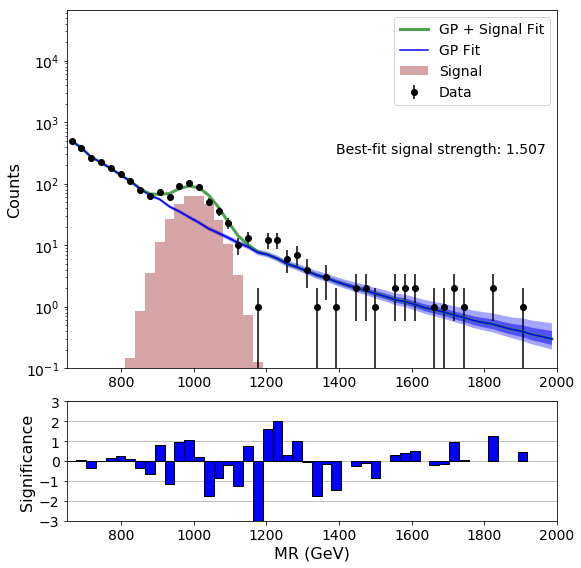

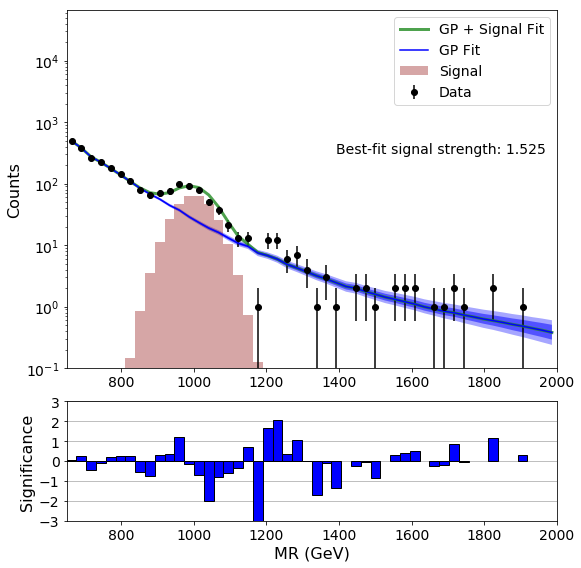

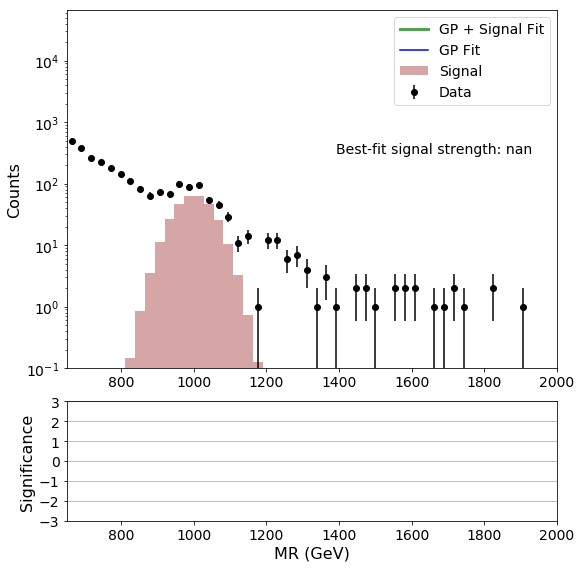

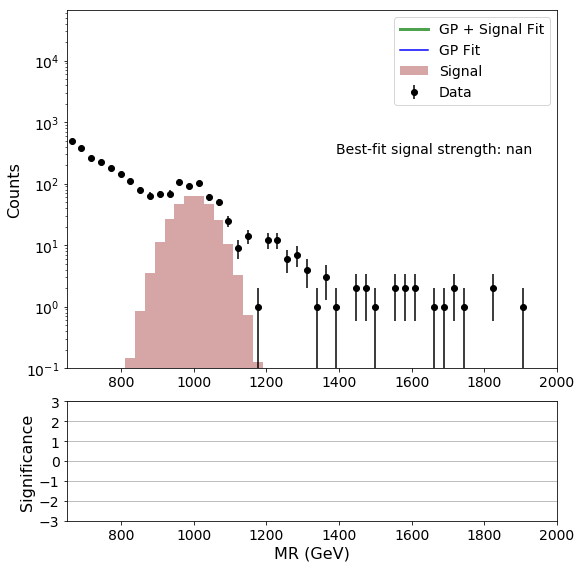

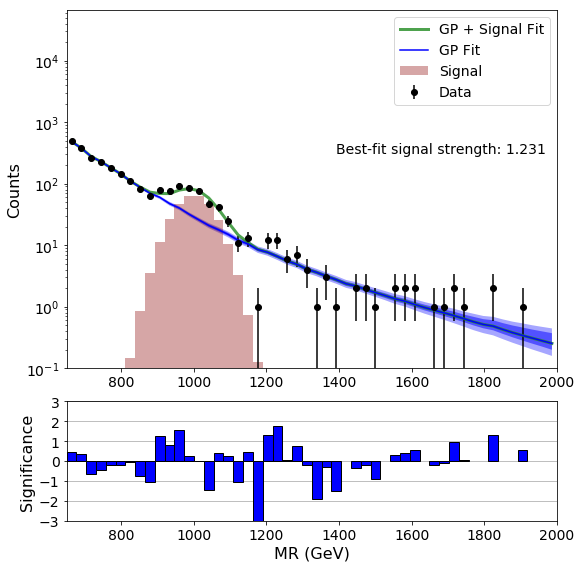

In [82]:
results_1p5 = analysis.run_s_plus_b(box, btags, sms, num_mr_bins, mr_max, verbose=False,
              k_ell=k_ell, k_alpha=k_alpha, mu_true=1.5, num_samples=40000, runs=5, opt_iterations=30)

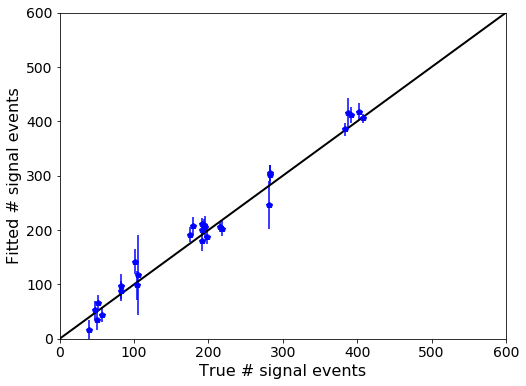

In [83]:
scatter_extracted_signal(results+results_2+results_0p5+results_0p25+results_1p5, nmax=600)
plt.show();